In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk
Child returned 0


Setting environment for AWS compute node
rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.52 seconds.
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.42 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt
Child returned 0


rm -rf /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt && mkdir -p /shared/CSHL_data_processed/MD635
aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


Child returned 1
0.41 seconds.
File does not exist: /shared/CSHL_data_processed/MD635/MD635_alignedTo_MD635-F63-2016.05.19-08.39.03_MD635_2_0188_cropbox.txt


In [2]:
# Does not work for the mxnet version on 3/30/2017
# model_dir_name = 'Sat16ClassFinetuned'
# model_name = 'Sat16ClassFinetuned'
# model_iteration = 10
# output_symbol_name = 'flatten_output'
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'saturation_mean_224.npy'))

# model_dir_name = 'vgg16-blue'
# model_name = 'vgg16-blue'
# model_iteration = 0
# output_symbol_name = 'fc7_output'
# output_dim = 4096
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'vgg_mean.npy'))

# model_dir_name = 'vgg19'
# model_name = 'vgg19'
# model_iteration = 0
# output_symbol_name = 'fc8_output'

# model_dir_name = 'inception-bn'
# model_name = 'Inception-BN'
# model_iteration = 126
# output_symbol_name = 'flatten_output'
# mean_img = mx.nd.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'mean_224.nd'))['mean_img'].asnumpy()

model_dir_name = 'inception-bn-blue'
download_from_s3(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name), is_dir=True)
model_name = 'inception-bn-blue'
model_iteration = 0
output_symbol_name = 'flatten_output'
output_dim = 1024
mean_img = np.load(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# Reference on how to predict with mxnet model:
# https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
model0, arg_params, aux_params = mx.model.load_checkpoint(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, model_name), 0)
flatten_output = model0.get_internals()[output_symbol_name]
model = mx.mod.Module(context=[mx.gpu(i) for i in range(8)], 
                        symbol=flatten_output)
# Increase batch_size to 500 does not save any time.
batch_size = 256
model.bind(data_shapes=[('data', (batch_size,1,224,224))], for_training=False)
model.set_params(arg_params=arg_params, aux_params=aux_params, allow_missing=True)

# model_dir_name = 'inception-bn-sat'
# model_name = 'inception-bn-sat'
# model_iteration = 0
# mean_img = np.load(os.path.join(MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# model = mx.model.FeedForward.load(os.path.join(MODEL_ROOTDIR, model_dir_name, model_name), model_iteration, ctx=mx.gpu())

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:52: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [3]:
# Visualize network topology

# a = mx.viz.plot_network(flatten_output, shape={"data":(1, 1, 224, 224)}, node_attrs={"shape":'rect',"fixedsize":'false'})
# a.render(model_name)

In [4]:
patch_size = 224
half_size = patch_size/2
stride = 56

In [5]:
# for stack in ['MD642']:
#     download_from_s3(DataManager.get_thumbnail_mask_dir_v3(stack=stack, version='cropped'), is_dir=True, redownload=True)

In [6]:
# for stack in [
#  'MD642']:
#     # 450 second to download entire folder one stack
#     # 1025 seconds to download file by file
#     download_from_s3(DataManager.get_image_dir(stack=stack, version='cropped_gray'), is_dir=True, redownload=True)

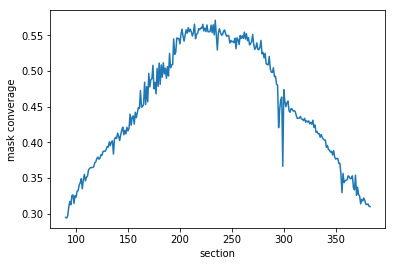

In [ ]:
# This shows that a mask covers 50% to 75% of the full area, so predicting only on masks roughly halves the time.

stack = 'MD652'
image_width, image_height = metadata_cache['image_shape'][stack]
first_detect_sec, last_detect_sec = metadata_cache['section_limits'][stack]
a = image_width / 32 * image_height / 32
mask_coverage = {sec: np.count_nonzero(DataManager.load_thumbnail_mask_v3(stack=stack, section=sec))/float(a)
for sec in range(first_detect_sec, last_detect_sec+1) if not is_invalid(stack=stack, sec=sec)}
plt.plot(mask_coverage.keys(), mask_coverage.values());
plt.xlabel('section');
plt.ylabel('mask converage');

In [ ]:
# for stack in all_stacks:
for stack in [
 'MD652', 'MD653', 'MD657', 'MD658']:
    
#     if stack in ['MD585', 'MD589']:
#         continue

    download_from_s3(DataManager.get_thumbnail_mask_dir_v3(stack=stack, version='cropped'), is_dir=True)
    download_from_s3(DataManager.get_image_dir(stack=stack, version='cropped_gray'), is_dir=True)
    # download takes 3000 sec.

    print stack

    section_to_filename = metadata_cache['sections_to_filenames'][stack]

    image_width, image_height = metadata_cache['image_shape'][stack]
    grid_spec = (patch_size, stride, image_width, image_height)

    sample_locations = grid_parameters_to_sample_locations(grid_spec=grid_spec)

    first_sec, last_sec = metadata_cache['section_limits'][stack]

    bar = show_progress_bar(first_sec, last_sec)
    
    for sec in range(first_sec, last_sec+1):
        
        if is_invalid(stack=stack, sec=sec):
            continue
            
#         if section_to_filename[sec].split('-')[1][0] == 'F':
#             continue
#         if section_to_filename[sec].split('-')[1][0] == 'N':
#             continue
                
        bar.value = sec
        
        sys.stderr.write('\nSection %d.\n' % sec)

        # Use grids only on mask.
        t = time.time()
        mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, section=sec, version='aligned_cropped')
        indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb)
        sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       
        
#         Use grids on the entire frame.
#         indices_roi = range(len(sample_locations))

        n = len(indices_roi)
        sys.stderr.write('%d samples.\n' % n)

        sample_locations_roi = sample_locations[indices_roi]
        
        t = time.time()
        img_fp = DataManager.get_image_filepath(stack=stack, section=sec, version='cropped_gray', resol='lossless')
        download_from_s3(img_fp)
        im = img_as_ubyte(imread(img_fp))
        sys.stderr.write('load image: %.2f seconds\n' % (time.time() - t)) # ~ 35s

        t = time.time()

        patches = np.array([im[y-half_size:y+half_size, x-half_size:x+half_size]
                            for x, y in sample_locations_roi]) # n x 224 x 224
        patches_mean_subtracted = patches - mean_img
        patches_mean_subtracted_input = patches_mean_subtracted[:, None, :, :] # n x 1 x 224 x 224

#         patches = np.array([im[y-half_size:y+half_size, x-half_size:x+half_size]
#                             for x, y in sample_locations_roi]) # n x 224 x 224 x 1
#         patches_mean_subtracted_input = np.rollaxis(patches, 3, 1) - mean_img # n x 3 x 224 x 224

        sys.stderr.write('extract patches: %.2f seconds\n' % (time.time() - t)) # ~ 20s / 140k patches

        # For mxnet 0.9.4, using 80000 patches in a NDArrayIter works but using 90000 patches causes error:
        # TypeError: Invalid type '<type 'numpy.ndarray'>' for data, should be NDArray or numpy.ndarray

        t1 = time.time()        
        data_iter = mx.io.NDArrayIter(
                        patches_mean_subtracted_input, 
                        batch_size=batch_size,
                        shuffle=False)
        outputs = model.predict(data_iter, always_output_list=True)
        features = outputs[0].asnumpy()
        
#         n_each_iter = 80000
#         for b in range(0, n, n_each_iter):
#             data_iter = mx.io.NDArrayIter(
#                             patches_mean_subtracted_input[b:b+n_each_iter], 
#                             batch_size=batch_size,
#                             shuffle=False)
            
#             # Reference on how to predict with mxnet model:
#             # https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
# #             model.bind(data_iter.provide_data, for_training=False)
# #             model.set_params(arg_params=arg_params, aux_params=aux_params, allow_missing=True)
#             outputs = model.predict(data_iter, always_output_list=True)
#             features[b:b+n_each_iter] = outputs[0].asnumpy()
        
#             del data_iter
        
        sys.stderr.write('predict: %.2f seconds\n' % (time.time() - t1)) 
        # All times below are after the first iteration (which is slow due to model loading into GPU).
        # inception-bn-blue ~125s / 48k patches on workstation single Titan X
        # inception-bn-blue ~27s / 48k patches on AWS p2.8xlarge 8 Tesla K80

    # Had to modify [model]-symbol.json according to this https://github.com/dmlc/mxnet/issues/2718
        
#         del patches_mean_subtracted_input, patches, im
        del patches_mean_subtracted_input, patches_mean_subtracted, patches, im
        
        t = time.time()

        features_fp = DataManager.get_dnn_features_filepath(stack=stack, model_name=model_name, 
                                                          section=sec)
        create_parent_dir_if_not_exists(features_fp)
        bp.pack_ndarray_file(features.astype(np.float16), features_fp) # bloscpack produces files of similar size
        upload_to_s3(features_fp, local_root=DATA_ROOTDIR)

        feature_locs_fp = DataManager.get_dnn_feature_locations_filepath(stack=stack, model_name=model_name, 
                                                  section=sec)
        np.savetxt(feature_locs_fp, np.c_[indices_roi, sample_locations_roi], fmt='%d %d %d')
        upload_to_s3(feature_locs_fp, local_root=DATA_ROOTDIR)

        sys.stderr.write('save: %.2f seconds\n' % (time.time() - t)) # ~.5s
        
# Overall time: 2.5 hours / stack, on AWS using p2.8xlarge 8 Tesla K80.

MD652


Widget Javascript not detected.  It may not be installed or enabled properly.



Section 90.
locate patches: 0.02 seconds
32886 samples.
load image: 0.26 seconds
extract patches: 95.21 seconds
predict: 47.96 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.84 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.30 seconds

Section 91.
locate patches: 0.02 seconds
32822 samples.
load image: 0.27 seconds
extract patches: 3.67 seconds
predict: 133.61 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.94 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.35 seconds

Section 92.
locate patches: 0.02 seconds
33132 samples.
load image: 0.28 seconds
extract patches: 3.30 seconds
predict: 49.45 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.61 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_1_0046_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.03 seconds

Section 93.
locate patches: 0.02 seconds
34581 samples.
load image: 0.28 seconds
extract patches: 3.43 seconds
predict: 68.47 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.90 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.45 seconds

Section 94.
locate patches: 0.02 seconds
35399 samples.
load image: 0.28 seconds
extract patches: 3.52 seconds
predict: 75.44 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.71 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_2_0047_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.87 seconds.
save: 3.32 seconds

Section 95.
locate patches: 0.02 seconds
34884 samples.
load image: 0.28 seconds
extract patches: 4.03 seconds
predict: 38.64 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.29 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N16-2016.12.16-06.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.84 seconds

Section 96.
locate patches: 0.02 seconds
36362 samples.
load image: 0.28 seconds
extract patches: 3.61 seconds
predict: 64.70 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.80 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F16-2016.12.16-21.00.10_MD652_3_0048_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.33 seconds

Section 97.
locate patches: 0.02 seconds
36438 samples.
load image: 0.28 seconds
extract patches: 4.21 seconds
predict: 61.74 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
4.34 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 5.87 seconds

Section 98.
locate patches: 0.02 seconds
35109 samples.
load image: 0.27 seconds
extract patches: 3.93 seconds
predict: 37.91 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_1_0049_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.72 seconds.
save: 3.44 seconds

Section 99.
locate patches: 0.02 seconds
36319 samples.
load image: 0.27 seconds
extract patches: 4.06 seconds
predict: 26.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.96 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.49 seconds

Section 100.
locate patches: 0.02 seconds
36107 samples.
load image: 0.27 seconds
extract patches: 4.04 seconds
predict: 24.12 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.11 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_2_0050_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.56 seconds

Section 101.
locate patches: 0.02 seconds
37041 samples.
load image: 0.27 seconds
extract patches: 4.16 seconds
predict: 32.13 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.06 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N17-2016.12.16-06.05.01_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.58 seconds

Section 102.
locate patches: 0.02 seconds
37063 samples.
load image: 0.27 seconds
extract patches: 3.54 seconds
predict: 32.70 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F17-2016.12.16-21.14.41_MD652_3_0051_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.47 seconds

Section 103.
locate patches: 0.02 seconds
38008 samples.
load image: 0.27 seconds
extract patches: 3.65 seconds
predict: 40.55 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.99 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.49 seconds

Section 104.
locate patches: 0.02 seconds
38318 samples.
load image: 0.27 seconds
extract patches: 3.65 seconds
predict: 45.17 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.11 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_1_0052_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.61 seconds

Section 105.
locate patches: 0.02 seconds
38971 samples.
load image: 0.27 seconds
extract patches: 4.37 seconds
predict: 49.19 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.81 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.37 seconds

Section 106.
locate patches: 0.02 seconds
37383 samples.
load image: 0.27 seconds
extract patches: 3.58 seconds
predict: 35.02 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.06 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_2_0053_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.54 seconds

Section 107.
locate patches: 0.02 seconds
38777 samples.
load image: 0.27 seconds
extract patches: 3.70 seconds
predict: 47.50 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.79 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N18-2016.12.16-06.09.52_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.30 seconds

Section 108.
locate patches: 0.02 seconds
39680 samples.
load image: 0.27 seconds
extract patches: 3.79 seconds
predict: 56.25 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F18-2016.12.16-21.30.08_MD652_3_0054_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 3.61 seconds

Section 109.
locate patches: 0.02 seconds
38643 samples.
load image: 0.27 seconds
extract patches: 3.69 seconds
predict: 45.48 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.90 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.41 seconds

Section 110.
locate patches: 0.02 seconds
39220 samples.
load image: 0.27 seconds
extract patches: 3.76 seconds
predict: 43.22 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.25 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_1_0055_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.76 seconds

Section 111.
locate patches: 0.02 seconds
39368 samples.
load image: 0.27 seconds
extract patches: 3.76 seconds
predict: 41.60 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.56 seconds

Section 112.
locate patches: 0.02 seconds
40374 samples.
load image: 0.27 seconds
extract patches: 3.85 seconds
predict: 53.83 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.06 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_2_0056_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.60 seconds

Section 113.
locate patches: 0.02 seconds
40597 samples.
load image: 0.27 seconds
extract patches: 3.88 seconds
predict: 44.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.88 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N19-2016.12.16-06.14.44_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.42 seconds

Section 114.
locate patches: 0.02 seconds
40765 samples.
load image: 0.27 seconds
extract patches: 3.89 seconds
predict: 43.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.04 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F19-2016.12.16-21.46.59_MD652_3_0057_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.59 seconds

Section 115.
locate patches: 0.02 seconds
40755 samples.
load image: 0.27 seconds
extract patches: 4.59 seconds
predict: 42.03 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.10 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.69 seconds

Section 116.
locate patches: 0.02 seconds
40740 samples.
load image: 0.27 seconds
extract patches: 3.90 seconds
predict: 38.11 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.39 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_1_0058_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.93 seconds

Section 117.
locate patches: 0.02 seconds
40876 samples.
load image: 0.27 seconds
extract patches: 4.59 seconds
predict: 42.62 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.95 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.55 seconds

Section 118.
locate patches: 0.02 seconds
41500 samples.
load image: 0.27 seconds
extract patches: 4.00 seconds
predict: 44.13 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.80 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_2_0059_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.35 seconds

Section 119.
locate patches: 0.02 seconds
41674 samples.
load image: 0.27 seconds
extract patches: 3.97 seconds
predict: 47.92 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.06 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N20-2016.12.16-06.19.41_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.67 seconds

Section 120.
locate patches: 0.02 seconds
42163 samples.
load image: 0.27 seconds
extract patches: 4.02 seconds
predict: 42.51 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.10 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F20-2016.12.16-22.03.21_MD652_3_0060_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.67 seconds

Section 121.
locate patches: 0.02 seconds
42397 samples.
load image: 0.27 seconds
extract patches: 4.04 seconds
predict: 45.68 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.04 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.62 seconds

Section 122.
locate patches: 0.02 seconds
42063 samples.
load image: 0.27 seconds
extract patches: 4.02 seconds
predict: 42.88 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.01 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_1_0061_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.58 seconds

Section 123.
locate patches: 0.02 seconds
42203 samples.
load image: 0.27 seconds
extract patches: 4.03 seconds
predict: 43.80 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.98 seconds

Section 124.
locate patches: 0.02 seconds
42758 samples.
load image: 0.27 seconds
extract patches: 4.07 seconds
predict: 44.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_2_0062_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.09 seconds

Section 125.
locate patches: 0.02 seconds
42679 samples.
load image: 0.27 seconds
extract patches: 4.07 seconds
predict: 53.35 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.05 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N21-2016.12.16-06.24.42_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.68 seconds

Section 126.
locate patches: 0.02 seconds
43285 samples.
load image: 0.27 seconds
extract patches: 4.15 seconds
predict: 56.86 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.91 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F21-2016.12.16-22.20.12_MD652_3_0063_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.55 seconds

Section 127.
locate patches: 0.02 seconds
43333 samples.
load image: 0.27 seconds
extract patches: 4.84 seconds
predict: 56.78 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.99 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.59 seconds

Section 128.
locate patches: 0.02 seconds
43280 samples.
load image: 0.27 seconds
extract patches: 4.85 seconds
predict: 59.66 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.96 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_1_0064_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.60 seconds

Section 129.
locate patches: 0.02 seconds
43581 samples.
load image: 0.27 seconds
extract patches: 4.17 seconds
predict: 59.20 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.06 seconds

Section 130.
locate patches: 0.02 seconds
44027 samples.
load image: 0.27 seconds
extract patches: 4.19 seconds
predict: 68.76 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.52 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_2_0065_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.18 seconds

Section 131.
locate patches: 0.02 seconds
43906 samples.
load image: 0.27 seconds
extract patches: 4.18 seconds
predict: 65.74 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.17 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N22-2016.12.16-06.29.48_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.82 seconds

Section 132.
locate patches: 0.02 seconds
44727 samples.
load image: 0.27 seconds
extract patches: 4.29 seconds
predict: 71.31 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.66 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F22-2016.12.16-22.38.10_MD652_3_0066_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.34 seconds

Section 133.
locate patches: 0.02 seconds
44181 samples.
load image: 0.27 seconds
extract patches: 4.22 seconds
predict: 64.13 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.73 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.39 seconds

Section 134.
locate patches: 0.02 seconds
44774 samples.
load image: 0.27 seconds
extract patches: 4.27 seconds
predict: 61.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.08 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_1_0067_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.77 seconds

Section 135.
locate patches: 0.02 seconds
44902 samples.
load image: 0.28 seconds
extract patches: 4.31 seconds
predict: 69.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.55 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.18 seconds

Section 136.
locate patches: 0.02 seconds
42855 samples.
load image: 0.27 seconds
extract patches: 4.08 seconds
predict: 40.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.98 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_2_0068_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.57 seconds

Section 137.
locate patches: 0.02 seconds
45190 samples.
load image: 0.27 seconds
extract patches: 4.31 seconds
predict: 68.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N23-2016.12.16-06.35.05_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.01 seconds

Section 138.
locate patches: 0.02 seconds
45468 samples.
load image: 0.27 seconds
extract patches: 4.33 seconds
predict: 59.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F23-2016.12.16-22.55.44_MD652_3_0069_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.45 seconds

Section 139.
locate patches: 0.02 seconds
45274 samples.
load image: 0.27 seconds
extract patches: 4.32 seconds
predict: 64.12 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.05 seconds

Section 140.
locate patches: 0.02 seconds
46125 samples.
load image: 0.27 seconds
extract patches: 4.40 seconds
predict: 76.96 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.49 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_1_0070_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 5.20 seconds

Section 141.
locate patches: 0.02 seconds
45607 samples.
load image: 0.27 seconds
extract patches: 4.35 seconds
predict: 70.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.10 seconds

Section 142.
locate patches: 0.02 seconds
44961 samples.
load image: 0.27 seconds
extract patches: 4.28 seconds
predict: 43.30 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.08 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_2_0071_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.70 seconds

Section 143.
locate patches: 0.02 seconds
45879 samples.
load image: 0.27 seconds
extract patches: 4.38 seconds
predict: 53.64 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N24-2016.12.16-06.40.27_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.00 seconds

Section 144.
locate patches: 0.02 seconds
46601 samples.
load image: 0.27 seconds
extract patches: 4.44 seconds
predict: 61.96 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F24-2016.12.16-23.13.26_MD652_3_0072_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.07 seconds

Section 145.
locate patches: 0.02 seconds
47081 samples.
load image: 0.27 seconds
extract patches: 5.26 seconds
predict: 68.03 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.05 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.71 seconds

Section 146.
locate patches: 0.02 seconds
45888 samples.
load image: 0.27 seconds
extract patches: 4.37 seconds
predict: 53.52 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.42 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_1_0073_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.07 seconds

Section 147.
locate patches: 0.02 seconds
46588 samples.
load image: 0.27 seconds
extract patches: 4.43 seconds
predict: 63.40 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.07 seconds

Section 148.
locate patches: 0.02 seconds
46028 samples.
load image: 0.27 seconds
extract patches: 4.40 seconds
predict: 48.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.89 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_2_0074_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.54 seconds

Section 149.
locate patches: 0.02 seconds
47079 samples.
load image: 0.27 seconds
extract patches: 4.48 seconds
predict: 57.66 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.84 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N25-2016.12.16-06.45.45_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.51 seconds

Section 150.
locate patches: 0.02 seconds
46479 samples.
load image: 0.27 seconds
extract patches: 5.19 seconds
predict: 52.57 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.14 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F25-2016.12.21-19.17.55_MD652_3_0075_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.80 seconds

Section 151.
locate patches: 0.02 seconds
46934 samples.
load image: 0.27 seconds
extract patches: 5.24 seconds
predict: 61.26 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.96 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.62 seconds

Section 152.
locate patches: 0.02 seconds
49120 samples.
load image: 0.27 seconds
extract patches: 4.70 seconds
predict: 265.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.68 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_1_0076_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.41 seconds

Section 153.
locate patches: 0.02 seconds
47401 samples.
load image: 0.27 seconds
extract patches: 4.53 seconds
predict: 32.00 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.98 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N26-2016.12.16-06.51.17_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.66 seconds

Section 154.
locate patches: 0.02 seconds
48694 samples.
load image: 0.27 seconds
extract patches: 4.64 seconds
predict: 46.90 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F26-2016.12.16-23.32.06_MD652_2_0077_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.92 seconds

Section 155.
locate patches: 0.02 seconds
48893 samples.
load image: 0.27 seconds
extract patches: 4.66 seconds
predict: 39.96 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.88 seconds

Section 156.
locate patches: 0.02 seconds
47573 samples.
load image: 0.27 seconds
extract patches: 4.55 seconds
predict: 27.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.08 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_1_0079_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 3.75 seconds

Section 157.
locate patches: 0.02 seconds
49462 samples.
load image: 0.27 seconds
extract patches: 4.72 seconds
predict: 47.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.46 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N27-2016.12.16-06.55.08_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.16 seconds

Section 158.
locate patches: 0.02 seconds
48581 samples.
load image: 0.27 seconds
extract patches: 4.63 seconds
predict: 27.65 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.94 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F27-2016.12.16-23.47.41_MD652_2_0080_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.67 seconds

Section 159.
locate patches: 0.02 seconds
49399 samples.
load image: 0.27 seconds
extract patches: 4.72 seconds
predict: 32.57 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.28 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.98 seconds

Section 160.
locate patches: 0.02 seconds
50216 samples.
load image: 0.27 seconds
extract patches: 4.80 seconds
predict: 41.23 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_1_0082_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.96 seconds

Section 161.
locate patches: 0.02 seconds
50052 samples.
load image: 0.27 seconds
extract patches: 4.80 seconds
predict: 43.86 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N28-2016.12.16-06.59.20_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.11 seconds

Section 162.
locate patches: 0.02 seconds
52872 samples.
load image: 0.27 seconds
extract patches: 5.07 seconds
predict: 75.31 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.28 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F28-2016.12.17-00.07.19_MD652_2_0083_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.06 seconds

Section 163.
locate patches: 0.02 seconds
50281 samples.
load image: 0.27 seconds
extract patches: 4.80 seconds
predict: 51.84 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.12 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.90 seconds

Section 164.
locate patches: 0.02 seconds
50345 samples.
load image: 0.27 seconds
extract patches: 4.82 seconds
predict: 53.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.19 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_1_0085_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.98 seconds

Section 165.
locate patches: 0.02 seconds
50706 samples.
load image: 0.27 seconds
extract patches: 4.84 seconds
predict: 57.40 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.96 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N29-2016.12.16-07.03.34_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.70 seconds

Section 166.
locate patches: 0.02 seconds
54203 samples.
load image: 0.27 seconds
extract patches: 5.19 seconds
predict: 100.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F29-2016.12.17-00.27.10_MD652_2_0086_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.04 seconds

Section 167.
locate patches: 0.02 seconds
50691 samples.
load image: 0.27 seconds
extract patches: 4.83 seconds
predict: 44.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.98 seconds

Section 168.
locate patches: 0.02 seconds
53481 samples.
load image: 0.27 seconds
extract patches: 5.10 seconds
predict: 39.36 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.23 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_1_0088_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.02 seconds

Section 169.
locate patches: 0.02 seconds
51085 samples.
load image: 0.27 seconds
extract patches: 4.87 seconds
predict: 29.02 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.28 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N30-2016.12.16-07.07.49_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.07 seconds

Section 170.
locate patches: 0.02 seconds
55585 samples.
load image: 0.27 seconds
extract patches: 5.31 seconds
predict: 54.70 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.15 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F30-2016.12.17-00.43.54_MD652_2_0089_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.03 seconds

Section 171.
locate patches: 0.02 seconds
53460 samples.
load image: 0.28 seconds
extract patches: 5.18 seconds
predict: 35.58 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.32 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.15 seconds

Section 172.
locate patches: 0.02 seconds
54583 samples.
load image: 0.28 seconds
extract patches: 5.30 seconds
predict: 44.40 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_1_0091_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.93 seconds.
save: 4.30 seconds

Section 173.
locate patches: 0.02 seconds
54725 samples.
load image: 0.28 seconds
extract patches: 5.31 seconds
predict: 46.77 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.05 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N31-2016.12.16-07.12.04_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.92 seconds

Section 174.
locate patches: 0.02 seconds
56826 samples.
load image: 0.28 seconds
extract patches: 6.46 seconds
predict: 63.89 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F31-2016.12.17-01.03.29_MD652_2_0092_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.18 seconds

Section 175.
locate patches: 0.02 seconds
53145 samples.
load image: 0.27 seconds
extract patches: 5.07 seconds
predict: 33.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.13 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.90 seconds

Section 176.
locate patches: 0.02 seconds
54150 samples.
load image: 0.27 seconds
extract patches: 5.16 seconds
predict: 41.26 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.52 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_1_0094_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.33 seconds

Section 177.
locate patches: 0.02 seconds
52379 samples.
load image: 0.27 seconds
extract patches: 5.00 seconds
predict: 29.67 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N32-2016.12.16-07.16.28_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.17 seconds

Section 178.
locate patches: 0.02 seconds
56349 samples.
load image: 0.27 seconds
extract patches: 5.41 seconds
predict: 62.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.98 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F32-2016.12.17-01.20.56_MD652_2_0095_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.87 seconds

Section 179.
locate patches: 0.02 seconds
53548 samples.
load image: 0.27 seconds
extract patches: 5.12 seconds
predict: 36.50 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.28 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.12 seconds

Section 180.
locate patches: 0.02 seconds
57120 samples.
load image: 0.27 seconds
extract patches: 5.46 seconds
predict: 57.53 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.24 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_1_0097_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.09 seconds

Section 181.
locate patches: 0.02 seconds
53843 samples.
load image: 0.27 seconds
extract patches: 5.14 seconds
predict: 30.84 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N33-2016.12.16-07.20.49_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
1.88 seconds.
save: 5.36 seconds

Section 182.
locate patches: 0.02 seconds
56821 samples.
load image: 0.28 seconds
extract patches: 5.52 seconds
predict: 44.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.14 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F33-2016.12.17-01.41.02_MD652_2_0098_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.05 seconds

Section 183.
locate patches: 0.02 seconds
54995 samples.
load image: 0.28 seconds
extract patches: 5.35 seconds
predict: 31.38 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.22 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.02 seconds

Section 184.
locate patches: 0.02 seconds
57145 samples.
load image: 0.27 seconds
extract patches: 5.48 seconds
predict: 48.43 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.40 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_1_0100_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.89 seconds.
save: 4.37 seconds

Section 185.
locate patches: 0.02 seconds
55499 samples.
load image: 0.27 seconds
extract patches: 5.30 seconds
predict: 31.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N34-2016.12.16-07.25.09_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 3.62 seconds

Section 186.
locate patches: 0.02 seconds
56294 samples.
load image: 0.27 seconds
extract patches: 5.38 seconds
predict: 39.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.46 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F34-2016.12.17-02.01.21_MD652_2_0101_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.35 seconds

Section 187.
locate patches: 0.02 seconds
54839 samples.
load image: 0.27 seconds
extract patches: 5.24 seconds
predict: 31.45 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.87 seconds.
save: 4.28 seconds

Section 188.
locate patches: 0.02 seconds
56549 samples.
load image: 0.27 seconds
extract patches: 5.42 seconds
predict: 42.40 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_1_0103_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.42 seconds

Section 189.
locate patches: 0.02 seconds
55191 samples.
load image: 0.27 seconds
extract patches: 5.28 seconds
predict: 31.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.26 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N35-2016.12.16-07.29.35_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.07 seconds

Section 190.
locate patches: 0.02 seconds
58624 samples.
load image: 0.27 seconds
extract patches: 5.60 seconds
predict: 66.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F35-2016.12.17-02.22.15_MD652_2_0104_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.19 seconds

Section 191.
locate patches: 0.02 seconds
56493 samples.
load image: 0.27 seconds
extract patches: 6.32 seconds
predict: 35.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.26 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.14 seconds

Section 192.
locate patches: 0.02 seconds
56729 samples.
load image: 0.27 seconds
extract patches: 6.36 seconds
predict: 38.25 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_1_0106_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.33 seconds

Section 193.
locate patches: 0.02 seconds
56981 samples.
load image: 0.27 seconds
extract patches: 6.37 seconds
predict: 41.01 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.25 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N36-2016.12.16-07.34.00_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 5.16 seconds

Section 194.
locate patches: 0.02 seconds
60797 samples.
load image: 0.27 seconds
extract patches: 5.78 seconds
predict: 96.73 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.66 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F36-2016.12.17-02.42.25_MD652_2_0107_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.64 seconds

Section 195.
locate patches: 0.02 seconds
58468 samples.
load image: 0.27 seconds
extract patches: 5.57 seconds
predict: 68.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.37 seconds

Section 196.
locate patches: 0.02 seconds
58812 samples.
load image: 0.27 seconds
extract patches: 5.59 seconds
predict: 63.51 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.73 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_1_0109_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.68 seconds

Section 197.
locate patches: 0.02 seconds
60958 samples.
load image: 0.27 seconds
extract patches: 5.80 seconds
predict: 81.70 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.46 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N37-2016.12.16-07.38.28_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.45 seconds

Section 198.
locate patches: 0.02 seconds
60832 samples.
load image: 0.27 seconds
extract patches: 5.79 seconds
predict: 91.22 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F37-2016.12.17-03.03.35_MD652_2_0110_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.85 seconds

Section 199.
locate patches: 0.02 seconds
60830 samples.
load image: 0.27 seconds
extract patches: 5.79 seconds
predict: 81.72 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.78 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.76 seconds

Section 200.
locate patches: 0.02 seconds
60052 samples.
load image: 0.27 seconds
extract patches: 5.72 seconds
predict: 70.14 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.40 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_1_0112_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.37 seconds

Section 201.
locate patches: 0.02 seconds
61506 samples.
load image: 0.27 seconds
extract patches: 6.87 seconds
predict: 71.78 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N38-2016.12.16-07.43.16_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.31 seconds

Section 202.
locate patches: 0.03 seconds
62298 samples.
load image: 0.27 seconds
extract patches: 6.96 seconds
predict: 78.80 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F38-2016.12.17-03.26.49_MD652_2_0113_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.38 seconds

Section 203.
locate patches: 0.02 seconds
61157 samples.
load image: 0.27 seconds
extract patches: 6.86 seconds
predict: 73.43 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.50 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.44 seconds

Section 204.
locate patches: 0.02 seconds
60438 samples.
load image: 0.27 seconds
extract patches: 5.76 seconds
predict: 59.52 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_1_0115_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.32 seconds

Section 205.
locate patches: 0.02 seconds
61386 samples.
load image: 0.27 seconds
extract patches: 6.88 seconds
predict: 61.02 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.53 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N39-2016.12.16-07.48.08_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.53 seconds

Section 206.
locate patches: 0.02 seconds
62212 samples.
load image: 0.27 seconds
extract patches: 6.97 seconds
predict: 59.89 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.51 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F39-2016.12.17-03.48.57_MD652_2_0116_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.53 seconds

Section 207.
locate patches: 0.02 seconds
61652 samples.
load image: 0.27 seconds
extract patches: 6.91 seconds
predict: 57.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.64 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.80 seconds.
save: 4.60 seconds

Section 208.
locate patches: 0.03 seconds
62530 samples.
load image: 0.27 seconds
extract patches: 6.99 seconds
predict: 80.90 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.32 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_1_0118_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.27 seconds

Section 209.
locate patches: 0.02 seconds
61892 samples.
load image: 0.27 seconds
extract patches: 6.92 seconds
predict: 35.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.67 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N40-2016.12.16-07.53.01_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.67 seconds

Section 210.
locate patches: 0.03 seconds
62288 samples.
load image: 0.27 seconds
extract patches: 6.96 seconds
predict: 39.66 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.14 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F40-2016.12.17-04.11.06_MD652_2_0119_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.20 seconds

Section 211.
locate patches: 0.02 seconds
61879 samples.
load image: 0.27 seconds
extract patches: 5.89 seconds
predict: 35.23 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.69 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.68 seconds

Section 212.
locate patches: 0.03 seconds
61195 samples.
load image: 0.27 seconds
extract patches: 5.83 seconds
predict: 35.01 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_1_0121_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.82 seconds.
save: 4.36 seconds

Section 213.
locate patches: 0.02 seconds
61769 samples.
load image: 0.27 seconds
extract patches: 5.92 seconds
predict: 35.15 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.25 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N41-2016.12.16-07.57.55_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.93 seconds.
save: 4.34 seconds

Section 214.
locate patches: 0.03 seconds
63052 samples.
load image: 0.27 seconds
extract patches: 6.02 seconds
predict: 49.45 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.56 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F41-2016.12.17-04.32.16_MD652_2_0122_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.55 seconds

Section 215.
locate patches: 0.02 seconds
60837 samples.
load image: 0.27 seconds
extract patches: 5.86 seconds
predict: 34.53 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.55 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.52 seconds

Section 216.
locate patches: 0.03 seconds
61554 samples.
load image: 0.27 seconds
extract patches: 5.90 seconds
predict: 34.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_1_0124_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.42 seconds

Section 217.
locate patches: 0.02 seconds
61628 samples.
load image: 0.27 seconds
extract patches: 6.89 seconds
predict: 35.09 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.23 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N42-2016.12.16-08.02.35_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.17 seconds

Section 218.
locate patches: 0.02 seconds
62371 samples.
load image: 0.27 seconds
extract patches: 5.95 seconds
predict: 35.36 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.52 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F42-2016.12.17-04.52.39_MD652_2_0125_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.47 seconds

Section 219.
locate patches: 0.02 seconds
62209 samples.
load image: 0.27 seconds
extract patches: 6.97 seconds
predict: 35.45 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.53 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.53 seconds

Section 220.
locate patches: 0.02 seconds
62438 samples.
load image: 0.27 seconds
extract patches: 7.01 seconds
predict: 35.73 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.35 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_1_0127_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.36 seconds

Section 221.
locate patches: 0.02 seconds
62428 samples.
load image: 0.27 seconds
extract patches: 7.01 seconds
predict: 35.70 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.39 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N43-2016.12.16-08.07.23_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.45 seconds

Section 222.
locate patches: 0.03 seconds
63023 samples.
load image: 0.27 seconds
extract patches: 6.03 seconds
predict: 40.67 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F43-2016.12.17-05.14.08_MD652_2_0128_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.49 seconds

Section 223.
locate patches: 0.02 seconds
62046 samples.
load image: 0.27 seconds
extract patches: 6.98 seconds
predict: 35.67 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.12 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.12 seconds

Section 224.
locate patches: 0.02 seconds
62428 samples.
load image: 0.27 seconds
extract patches: 5.99 seconds
predict: 35.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_1_0130_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 5.34 seconds

Section 225.
locate patches: 0.02 seconds
61927 samples.
load image: 0.28 seconds
extract patches: 5.89 seconds
predict: 35.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.53 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N44-2016.12.16-08.12.21_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.47 seconds

Section 226.
locate patches: 0.03 seconds
62953 samples.
load image: 0.27 seconds
extract patches: 6.03 seconds
predict: 40.00 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.81 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F44-2016.12.17-05.33.57_MD652_2_0131_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.88 seconds

Section 227.
locate patches: 0.02 seconds
61883 samples.
load image: 0.27 seconds
extract patches: 5.90 seconds
predict: 35.35 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.46 seconds

Section 228.
locate patches: 0.02 seconds
61873 samples.
load image: 0.27 seconds
extract patches: 6.93 seconds
predict: 35.35 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.39 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_1_0133_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.33 seconds

Section 229.
locate patches: 0.02 seconds
61957 samples.
load image: 0.27 seconds
extract patches: 5.92 seconds
predict: 35.18 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.51 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.55 seconds

Section 230.
locate patches: 0.03 seconds
62911 samples.
load image: 0.27 seconds
extract patches: 6.00 seconds
predict: 35.84 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.48 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F45-2016.12.17-05.56.31_MD652_2_0134_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.54 seconds

Section 231.
locate patches: 0.02 seconds
61765 samples.
load image: 0.27 seconds
extract patches: 5.91 seconds
predict: 35.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.74 seconds

Section 232.
locate patches: 0.02 seconds
62995 samples.
load image: 0.27 seconds
extract patches: 6.04 seconds
predict: 35.73 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.29 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_1_0136_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.77 seconds.
save: 4.25 seconds

Section 233.
locate patches: 0.02 seconds
61421 samples.
load image: 0.27 seconds
extract patches: 5.86 seconds
predict: 34.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.34 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N46-2016.12.16-08.22.33_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.27 seconds

Section 234.
locate patches: 0.03 seconds
63667 samples.
load image: 0.27 seconds
extract patches: 6.06 seconds
predict: 42.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F46-2016.12.17-06.19.10_MD652_2_0137_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.41 seconds

Section 235.
locate patches: 0.02 seconds
61228 samples.
load image: 0.27 seconds
extract patches: 5.82 seconds
predict: 34.72 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.34 seconds

Section 236.
locate patches: 0.02 seconds
59186 samples.
load image: 0.27 seconds
extract patches: 5.64 seconds
predict: 33.73 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_1_0139_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.41 seconds

Section 237.
locate patches: 0.02 seconds
61683 samples.
load image: 0.27 seconds
extract patches: 5.88 seconds
predict: 35.18 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N47-2016.12.16-08.27.41_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.14 seconds

Section 238.
locate patches: 0.02 seconds
62347 samples.
load image: 0.27 seconds
extract patches: 5.93 seconds
predict: 35.43 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.64 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F47-2016.12.17-06.39.51_MD652_2_0140_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.64 seconds

Section 239.
locate patches: 0.02 seconds
61783 samples.
load image: 0.27 seconds
extract patches: 5.89 seconds
predict: 35.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.39 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.38 seconds

Section 240.
locate patches: 0.02 seconds
61308 samples.
load image: 0.27 seconds
extract patches: 5.83 seconds
predict: 35.11 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.53 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_1_0142_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.50 seconds

Section 241.
locate patches: 0.02 seconds
61370 samples.
load image: 0.27 seconds
extract patches: 5.86 seconds
predict: 34.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.46 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N48-2016.12.16-08.32.56_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.39 seconds

Section 242.
locate patches: 0.02 seconds
61963 samples.
load image: 0.27 seconds
extract patches: 5.91 seconds
predict: 35.27 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F48-2016.12.17-07.02.21_MD652_2_0143_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.37 seconds

Section 243.
locate patches: 0.02 seconds
62163 samples.
load image: 0.27 seconds
extract patches: 5.92 seconds
predict: 35.50 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.56 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.51 seconds

Section 244.
locate patches: 0.02 seconds
61530 samples.
load image: 0.27 seconds
extract patches: 5.87 seconds
predict: 34.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.50 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_1_0145_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.49 seconds

Section 245.
locate patches: 0.02 seconds
61143 samples.
load image: 0.27 seconds
extract patches: 5.85 seconds
predict: 34.71 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.77 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N49-2016.12.16-08.37.58_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.75 seconds

Section 246.
locate patches: 0.02 seconds
61269 samples.
load image: 0.27 seconds
extract patches: 5.84 seconds
predict: 35.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.66 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F49-2016.12.17-07.24.25_MD652_2_0146_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.65 seconds

Section 247.
locate patches: 0.03 seconds
61278 samples.
load image: 0.28 seconds
extract patches: 5.95 seconds
predict: 34.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.63 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.56 seconds

Section 248.
locate patches: 0.02 seconds
60147 samples.
load image: 0.28 seconds
extract patches: 6.82 seconds
predict: 34.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_1_0148_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.26 seconds

Section 249.
locate patches: 0.02 seconds
60521 samples.
load image: 0.28 seconds
extract patches: 5.88 seconds
predict: 53.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N50-2016.12.16-08.43.08_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.86 seconds.
save: 4.34 seconds

Section 250.
locate patches: 0.02 seconds
60324 samples.
load image: 0.28 seconds
extract patches: 5.87 seconds
predict: 34.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.41 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F50-2016.12.17-07.45.18_MD652_2_0149_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.43 seconds

Section 251.
locate patches: 0.02 seconds
60443 samples.
load image: 0.28 seconds
extract patches: 5.86 seconds
predict: 34.39 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.66 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.58 seconds

Section 252.
locate patches: 0.02 seconds
60276 samples.
load image: 0.28 seconds
extract patches: 5.87 seconds
predict: 34.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.29 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_1_0151_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.21 seconds

Section 253.
locate patches: 0.02 seconds
60896 samples.
load image: 0.27 seconds
extract patches: 5.82 seconds
predict: 34.77 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N51-2016.12.16-08.48.37_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.41 seconds

Section 254.
locate patches: 0.02 seconds
59298 samples.
load image: 0.27 seconds
extract patches: 5.65 seconds
predict: 33.77 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F51-2016.12.17-08.06.38_MD652_2_0152_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.35 seconds

Section 255.
locate patches: 0.02 seconds
60904 samples.
load image: 0.27 seconds
extract patches: 5.80 seconds
predict: 34.78 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.48 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.50 seconds

Section 256.
locate patches: 0.02 seconds
60689 samples.
load image: 0.27 seconds
extract patches: 5.79 seconds
predict: 34.56 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.44 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_1_0154_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.41 seconds

Section 257.
locate patches: 0.02 seconds
59945 samples.
load image: 0.27 seconds
extract patches: 5.72 seconds
predict: 34.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.17 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N52-2016.12.16-08.53.31_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.85 seconds.
save: 4.14 seconds

Section 258.
locate patches: 0.02 seconds
61315 samples.
load image: 0.27 seconds
extract patches: 5.87 seconds
predict: 35.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.53 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F52-2016.12.17-08.27.19_MD652_2_0155_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.56 seconds

Section 259.
locate patches: 0.02 seconds
60898 samples.
load image: 0.27 seconds
extract patches: 5.79 seconds
predict: 34.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.42 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.39 seconds

Section 260.
locate patches: 0.02 seconds
61250 samples.
load image: 0.27 seconds
extract patches: 5.86 seconds
predict: 53.52 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.61 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_1_0157_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.87 seconds.
save: 4.64 seconds

Section 261.
locate patches: 0.02 seconds
60871 samples.
load image: 0.27 seconds
extract patches: 5.82 seconds
predict: 34.80 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N53-2016.12.16-08.58.44_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.40 seconds

Section 262.
locate patches: 0.02 seconds
61836 samples.
load image: 0.27 seconds
extract patches: 5.90 seconds
predict: 35.28 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F53-2016.12.17-08.49.58_MD652_2_0158_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.42 seconds

Section 263.
locate patches: 0.02 seconds
60779 samples.
load image: 0.27 seconds
extract patches: 5.83 seconds
predict: 34.56 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.83 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.81 seconds

Section 264.
locate patches: 0.02 seconds
61577 samples.
load image: 0.41 seconds
extract patches: 5.89 seconds
predict: 35.17 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_1_0160_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.36 seconds

Section 265.
locate patches: 0.02 seconds
60524 samples.
load image: 0.27 seconds
extract patches: 5.78 seconds
predict: 34.54 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.65 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N54-2016.12.16-09.04.08_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.63 seconds

Section 266.
locate patches: 0.02 seconds
60962 samples.
load image: 0.47 seconds
extract patches: 5.86 seconds
predict: 34.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.61 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F54-2016.12.17-09.11.29_MD652_2_0161_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.58 seconds

Section 267.
locate patches: 0.02 seconds
59886 samples.
load image: 0.27 seconds
extract patches: 5.72 seconds
predict: 33.96 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.18 seconds

Section 268.
locate patches: 0.02 seconds
60075 samples.
load image: 1.02 seconds
extract patches: 5.75 seconds
predict: 34.31 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_1_0163_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.22 seconds

Section 269.
locate patches: 0.02 seconds
60417 samples.
load image: 0.27 seconds
extract patches: 5.78 seconds
predict: 34.48 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.17 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N55-2016.12.16-09.09.34_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.89 seconds.
save: 5.19 seconds

Section 270.
locate patches: 0.02 seconds
61481 samples.
load image: 2.04 seconds
extract patches: 5.87 seconds
predict: 34.98 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.22 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F55-2016.12.17-09.33.02_MD652_2_0164_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 5.21 seconds

Section 271.
locate patches: 0.02 seconds
60025 samples.
load image: 0.27 seconds
extract patches: 5.73 seconds
predict: 34.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.85 seconds.
save: 4.45 seconds

Section 272.
locate patches: 0.02 seconds
59229 samples.
load image: 1.36 seconds
extract patches: 5.66 seconds
predict: 33.80 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
6.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_1_0166_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 8.38 seconds

Section 273.
locate patches: 0.02 seconds
59410 samples.
load image: 0.27 seconds
extract patches: 5.69 seconds
predict: 33.72 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N56-2016.12.16-09.14.38_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.31 seconds

Section 274.
locate patches: 0.02 seconds
60181 samples.
load image: 0.71 seconds
extract patches: 5.75 seconds
predict: 34.20 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F56-2016.12.17-09.52.35_MD652_2_0167_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.29 seconds

Section 275.
locate patches: 0.02 seconds
59150 samples.
load image: 0.27 seconds
extract patches: 5.62 seconds
predict: 33.81 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.29 seconds

Section 276.
locate patches: 0.02 seconds
59064 samples.
load image: 0.27 seconds
extract patches: 5.63 seconds
predict: 33.29 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_1_0169_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.27 seconds

Section 277.
locate patches: 0.02 seconds
59498 samples.
load image: 0.28 seconds
extract patches: 5.76 seconds
predict: 34.11 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N57-2016.12.16-09.19.48_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.16 seconds

Section 278.
locate patches: 0.02 seconds
60570 samples.
load image: 0.27 seconds
extract patches: 5.76 seconds
predict: 34.61 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.40 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F57-2016.12.17-10.12.43_MD652_2_0170_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.31 seconds

Section 279.
locate patches: 0.02 seconds
58479 samples.
load image: 0.27 seconds
extract patches: 5.56 seconds
predict: 33.24 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.58 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.51 seconds

Section 280.
locate patches: 0.02 seconds
58645 samples.
load image: 0.27 seconds
extract patches: 5.59 seconds
predict: 33.34 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_1_0172_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.20 seconds

Section 281.
locate patches: 0.02 seconds
57838 samples.
load image: 0.27 seconds
extract patches: 5.50 seconds
predict: 32.82 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.42 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N58-2016.12.16-09.25.05_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.89 seconds.
save: 4.40 seconds

Section 282.
locate patches: 0.02 seconds
58534 samples.
load image: 0.28 seconds
extract patches: 5.80 seconds
predict: 33.29 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F58-2016.12.17-10.32.53_MD652_2_0173_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.26 seconds

Section 283.
locate patches: 0.02 seconds
56944 samples.
load image: 0.28 seconds
extract patches: 5.65 seconds
predict: 32.39 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.28 seconds

Section 284.
locate patches: 0.02 seconds
56833 samples.
load image: 0.27 seconds
extract patches: 5.44 seconds
predict: 32.53 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.52 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_1_0175_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.42 seconds

Section 285.
locate patches: 0.02 seconds
56789 samples.
load image: 0.27 seconds
extract patches: 5.41 seconds
predict: 32.31 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N59-2016.12.16-12.13.21_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.19 seconds

Section 286.
locate patches: 0.02 seconds
58064 samples.
load image: 0.27 seconds
extract patches: 5.53 seconds
predict: 33.34 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F59-2016.12.17-10.54.18_MD652_2_0176_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.19 seconds

Section 287.
locate patches: 0.02 seconds
56133 samples.
load image: 0.27 seconds
extract patches: 5.37 seconds
predict: 31.71 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.18 seconds

Section 288.
locate patches: 0.02 seconds
55636 samples.
load image: 0.27 seconds
extract patches: 5.30 seconds
predict: 31.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.51 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_1_0178_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.33 seconds

Section 289.
locate patches: 0.02 seconds
55615 samples.
load image: 0.27 seconds
extract patches: 5.35 seconds
predict: 31.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.38 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N60-2016.12.16-12.18.31_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.89 seconds.
save: 4.31 seconds

Section 290.
locate patches: 0.02 seconds
56315 samples.
load image: 0.27 seconds
extract patches: 5.40 seconds
predict: 31.90 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F60-2016.12.17-11.14.14_MD652_2_0179_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.26 seconds

Section 291.
locate patches: 0.02 seconds
54955 samples.
load image: 0.27 seconds
extract patches: 5.26 seconds
predict: 31.11 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.13 seconds

Section 292.
locate patches: 0.02 seconds
54982 samples.
load image: 0.27 seconds
extract patches: 5.25 seconds
predict: 31.12 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.37 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_1_0181_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.18 seconds

Section 293.
locate patches: 0.02 seconds
53803 samples.
load image: 0.27 seconds
extract patches: 5.15 seconds
predict: 30.51 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.33 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N61-2016.12.16-12.23.48_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.17 seconds

Section 294.
locate patches: 0.02 seconds
53621 samples.
load image: 0.27 seconds
extract patches: 5.14 seconds
predict: 30.42 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F61-2016.12.17-11.34.22_MD652_2_0182_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.07 seconds

Section 295.
locate patches: 0.02 seconds
47018 samples.
load image: 0.27 seconds
extract patches: 4.51 seconds
predict: 26.39 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.74 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.41 seconds

Section 296.
locate patches: 0.02 seconds
49799 samples.
load image: 0.27 seconds
extract patches: 4.77 seconds
predict: 28.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.48 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_1_0184_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.20 seconds

Section 297.
locate patches: 0.02 seconds
51377 samples.
load image: 0.27 seconds
extract patches: 4.90 seconds
predict: 29.14 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.26 seconds

Section 298.
locate patches: 0.02 seconds
51814 samples.
load image: 0.27 seconds
extract patches: 4.96 seconds
predict: 29.13 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.32 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_2_0185_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.13 seconds

Section 299.
locate patches: 0.02 seconds
40919 samples.
load image: 0.27 seconds
extract patches: 3.92 seconds
predict: 23.02 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.32 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N62-2016.12.16-12.46.01_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.93 seconds

Section 300.
locate patches: 0.02 seconds
52953 samples.
load image: 0.27 seconds
extract patches: 5.06 seconds
predict: 32.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F62-2016.12.17-11.54.35_MD652_3_0186_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.20 seconds

Section 301.
locate patches: 0.02 seconds
51145 samples.
load image: 0.27 seconds
extract patches: 4.91 seconds
predict: 29.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.43 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.17 seconds

Section 302.
locate patches: 0.02 seconds
50271 samples.
load image: 0.27 seconds
extract patches: 4.80 seconds
predict: 28.31 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.25 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_1_0187_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 4.03 seconds

Section 303.
locate patches: 0.02 seconds
50917 samples.
load image: 0.27 seconds
extract patches: 4.86 seconds
predict: 28.57 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.21 seconds

Section 304.
locate patches: 0.02 seconds
51197 samples.
load image: 0.27 seconds
extract patches: 4.89 seconds
predict: 28.99 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.15 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_2_0188_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.89 seconds

Section 305.
locate patches: 0.02 seconds
49663 samples.
load image: 0.27 seconds
extract patches: 4.77 seconds
predict: 28.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N63-2016.12.16-12.51.42_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.95 seconds

Section 306.
locate patches: 0.02 seconds
49421 samples.
load image: 0.27 seconds
extract patches: 4.72 seconds
predict: 27.97 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.20 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F63-2016.12.17-12.13.44_MD652_3_0189_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.92 seconds

Section 307.
locate patches: 0.02 seconds
50006 samples.
load image: 0.27 seconds
extract patches: 4.77 seconds
predict: 28.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.28 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.01 seconds

Section 308.
locate patches: 0.02 seconds
49917 samples.
load image: 0.27 seconds
extract patches: 4.77 seconds
predict: 28.26 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.19 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_1_0190_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.96 seconds

Section 309.
locate patches: 0.02 seconds
49620 samples.
load image: 0.27 seconds
extract patches: 4.77 seconds
predict: 27.91 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.97 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.68 seconds

Section 310.
locate patches: 0.02 seconds
49663 samples.
load image: 0.27 seconds
extract patches: 4.74 seconds
predict: 27.91 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.36 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_2_0191_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 4.17 seconds

Section 311.
locate patches: 0.02 seconds
49508 samples.
load image: 0.27 seconds
extract patches: 4.75 seconds
predict: 28.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.47 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N64-2016.12.16-12.57.33_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.18 seconds

Section 312.
locate patches: 0.02 seconds
48926 samples.
load image: 0.27 seconds
extract patches: 4.68 seconds
predict: 27.88 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F64-2016.12.17-12.36.08_MD652_3_0192_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.93 seconds

Section 313.
locate patches: 0.02 seconds
48460 samples.
load image: 0.27 seconds
extract patches: 4.63 seconds
predict: 27.50 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.57 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 4.26 seconds

Section 314.
locate patches: 0.02 seconds
48490 samples.
load image: 0.27 seconds
extract patches: 4.63 seconds
predict: 27.48 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_1_0193_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.85 seconds.
save: 4.05 seconds

Section 315.
locate patches: 0.02 seconds
48512 samples.
load image: 0.28 seconds
extract patches: 4.65 seconds
predict: 27.49 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.32 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.01 seconds

Section 316.
locate patches: 0.02 seconds
48759 samples.
load image: 0.27 seconds
extract patches: 4.65 seconds
predict: 27.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.27 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_2_0194_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.02 seconds

Section 317.
locate patches: 0.02 seconds
48378 samples.
load image: 0.27 seconds
extract patches: 4.61 seconds
predict: 27.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.24 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N65-2016.12.21-19.42.51_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.98 seconds

Section 318.
locate patches: 0.02 seconds
48308 samples.
load image: 0.27 seconds
extract patches: 4.61 seconds
predict: 27.28 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.13 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F65-2016.12.17-12.56.37_MD652_3_0195_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.77 seconds

Section 319.
locate patches: 0.02 seconds
48126 samples.
load image: 0.27 seconds
extract patches: 4.59 seconds
predict: 27.05 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.09 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 3.87 seconds

Section 320.
locate patches: 0.02 seconds
48456 samples.
load image: 0.27 seconds
extract patches: 4.63 seconds
predict: 27.23 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.83 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_1_0196_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.53 seconds

Section 321.
locate patches: 0.02 seconds
47892 samples.
load image: 0.27 seconds
extract patches: 4.58 seconds
predict: 27.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.02 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.70 seconds

Section 322.
locate patches: 0.02 seconds
48070 samples.
load image: 0.28 seconds
extract patches: 4.68 seconds
predict: 27.37 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_2_0197_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.89 seconds

Section 323.
locate patches: 0.02 seconds
47902 samples.
load image: 0.28 seconds
extract patches: 4.66 seconds
predict: 27.22 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N66-2016.12.16-13.08.48_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.89 seconds

Section 324.
locate patches: 0.02 seconds
48033 samples.
load image: 0.28 seconds
extract patches: 4.67 seconds
predict: 27.14 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.93 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F66-2016.12.17-13.17.05_MD652_3_0198_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 3.71 seconds

Section 325.
locate patches: 0.02 seconds
47611 samples.
load image: 0.28 seconds
extract patches: 4.63 seconds
predict: 27.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.94 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.67 seconds

Section 326.
locate patches: 0.02 seconds
47815 samples.
load image: 0.28 seconds
extract patches: 4.65 seconds
predict: 27.27 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.12 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_1_0199_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.85 seconds

Section 327.
locate patches: 0.02 seconds
47534 samples.
load image: 0.28 seconds
extract patches: 4.63 seconds
predict: 26.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.10 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.83 seconds

Section 328.
locate patches: 0.02 seconds
48154 samples.
load image: 0.28 seconds
extract patches: 4.69 seconds
predict: 29.39 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_2_0200_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 4.69 seconds

Section 329.
locate patches: 0.02 seconds
47056 samples.
load image: 0.28 seconds
extract patches: 4.58 seconds
predict: 26.76 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.98 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N67-2016.12.16-13.14.13_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.69 seconds

Section 330.
locate patches: 0.02 seconds
47407 samples.
load image: 0.27 seconds
extract patches: 4.55 seconds
predict: 26.99 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.03 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F67-2016.12.17-13.38.34_MD652_3_0201_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.70 seconds

Section 331.
locate patches: 0.02 seconds
46283 samples.
load image: 0.27 seconds
extract patches: 4.42 seconds
predict: 26.23 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.07 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.77 seconds

Section 332.
locate patches: 0.02 seconds
46372 samples.
load image: 0.27 seconds
extract patches: 4.42 seconds
predict: 26.27 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.31 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_1_0202_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.01 seconds

Section 333.
locate patches: 0.02 seconds
46075 samples.
load image: 0.27 seconds
extract patches: 4.40 seconds
predict: 26.06 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.10 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.79 seconds

Section 334.
locate patches: 0.02 seconds
46051 samples.
load image: 0.27 seconds
extract patches: 4.40 seconds
predict: 26.06 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.18 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_2_0203_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.82 seconds

Section 335.
locate patches: 0.02 seconds
45517 samples.
load image: 0.27 seconds
extract patches: 4.35 seconds
predict: 25.75 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.24 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N68-2016.12.16-13.19.41_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.87 seconds

Section 336.
locate patches: 0.02 seconds
45927 samples.
load image: 0.27 seconds
extract patches: 4.38 seconds
predict: 26.04 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
3.31 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F68-2016.12.17-14.00.21_MD652_3_0204_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 5.01 seconds

Section 337.
locate patches: 0.02 seconds
45490 samples.
load image: 0.27 seconds
extract patches: 4.35 seconds
predict: 25.71 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.17 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.85 seconds

Section 338.
locate patches: 0.02 seconds
45216 samples.
load image: 0.27 seconds
extract patches: 4.30 seconds
predict: 25.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_1_0205_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.84 seconds

Section 339.
locate patches: 0.02 seconds
45072 samples.
load image: 0.27 seconds
extract patches: 5.04 seconds
predict: 25.44 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.14 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.76 seconds

Section 340.
locate patches: 0.02 seconds
45062 samples.
load image: 0.27 seconds
extract patches: 5.03 seconds
predict: 25.37 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.23 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_2_0206_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.86 seconds

Section 341.
locate patches: 0.02 seconds
43942 samples.
load image: 0.27 seconds
extract patches: 4.90 seconds
predict: 24.87 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.93 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N69-2016.12.16-13.25.06_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.54 seconds

Section 342.
locate patches: 0.02 seconds
44214 samples.
load image: 0.27 seconds
extract patches: 4.95 seconds
predict: 25.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.15 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F69-2016.12.17-14.21.17_MD652_3_0207_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.76 seconds

Section 343.
locate patches: 0.02 seconds
43574 samples.
load image: 0.27 seconds
extract patches: 4.90 seconds
predict: 24.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.31 seconds

Section 344.
locate patches: 0.02 seconds
43452 samples.
load image: 0.27 seconds
extract patches: 4.87 seconds
predict: 24.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.87 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_1_0208_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.47 seconds

Section 345.
locate patches: 0.02 seconds
43156 samples.
load image: 0.27 seconds
extract patches: 4.83 seconds
predict: 24.41 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.16 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.75 seconds

Section 346.
locate patches: 0.02 seconds
43294 samples.
load image: 0.27 seconds
extract patches: 4.86 seconds
predict: 24.68 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.70 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_2_0209_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 4.35 seconds

Section 347.
locate patches: 0.02 seconds
42723 samples.
load image: 0.27 seconds
extract patches: 4.78 seconds
predict: 24.26 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.94 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N70-2016.12.16-13.30.25_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.57 seconds

Section 348.
locate patches: 0.02 seconds
43386 samples.
load image: 0.27 seconds
extract patches: 4.85 seconds
predict: 24.56 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.30 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F70-2016.12.17-14.40.15_MD652_3_0210_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.90 seconds

Section 349.
locate patches: 0.02 seconds
42343 samples.
load image: 0.27 seconds
extract patches: 4.79 seconds
predict: 24.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.54 seconds

Section 350.
locate patches: 0.02 seconds
42062 samples.
load image: 0.27 seconds
extract patches: 4.71 seconds
predict: 23.81 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_1_0211_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.78 seconds

Section 351.
locate patches: 0.02 seconds
42165 samples.
load image: 0.27 seconds
extract patches: 4.69 seconds
predict: 23.84 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.07 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.68 seconds

Section 352.
locate patches: 0.02 seconds
42180 samples.
load image: 0.27 seconds
extract patches: 4.70 seconds
predict: 23.86 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.86 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_2_0212_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.43 seconds

Section 353.
locate patches: 0.02 seconds
41396 samples.
load image: 0.27 seconds
extract patches: 3.94 seconds
predict: 23.36 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.01 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N71-2016.12.16-13.35.37_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.57 seconds

Section 354.
locate patches: 0.02 seconds
41402 samples.
load image: 0.27 seconds
extract patches: 3.96 seconds
predict: 23.22 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.84 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F71-2016.12.17-14.57.58_MD652_3_0213_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.39 seconds

Section 355.
locate patches: 0.02 seconds
39688 samples.
load image: 0.27 seconds
extract patches: 3.79 seconds
predict: 22.59 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.98 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.56 seconds

Section 356.
locate patches: 0.02 seconds
36783 samples.
load image: 0.27 seconds
extract patches: 3.50 seconds
predict: 20.90 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.81 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_1_0214_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.88 seconds.
save: 3.38 seconds

Section 357.
locate patches: 0.02 seconds
39810 samples.
load image: 0.27 seconds
extract patches: 3.79 seconds
predict: 22.63 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.75 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.28 seconds

Section 358.
locate patches: 0.02 seconds
38360 samples.
load image: 0.27 seconds
extract patches: 3.67 seconds
predict: 21.53 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_2_0215_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.47 seconds

Section 359.
locate patches: 0.02 seconds
38669 samples.
load image: 0.27 seconds
extract patches: 3.70 seconds
predict: 21.91 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.05 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N72-2016.12.16-13.40.42_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.55 seconds

Section 360.
locate patches: 0.02 seconds
38738 samples.
load image: 0.27 seconds
extract patches: 3.69 seconds
predict: 21.86 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F72-2016.12.17-15.15.41_MD652_3_0216_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.28 seconds

Section 361.
locate patches: 0.02 seconds
38842 samples.
load image: 0.27 seconds
extract patches: 3.72 seconds
predict: 22.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.80 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.35 seconds

Section 362.
locate patches: 0.02 seconds
39432 samples.
load image: 0.27 seconds
extract patches: 3.77 seconds
predict: 22.29 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.20 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_1_0217_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.67 seconds

Section 363.
locate patches: 0.02 seconds
39256 samples.
load image: 0.27 seconds
extract patches: 3.77 seconds
predict: 22.15 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.87 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.43 seconds

Section 364.
locate patches: 0.02 seconds
38975 samples.
load image: 0.27 seconds
extract patches: 3.73 seconds
predict: 21.95 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.05 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_2_0218_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.51 seconds

Section 365.
locate patches: 0.02 seconds
39049 samples.
load image: 0.27 seconds
extract patches: 3.74 seconds
predict: 22.21 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N73-2016.12.16-13.45.53_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.38 seconds

Section 366.
locate patches: 0.02 seconds
39402 samples.
load image: 0.27 seconds
extract patches: 3.79 seconds
predict: 22.27 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.10 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F73-2016.12.17-15.32.01_MD652_3_0219_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.67 seconds

Section 367.
locate patches: 0.02 seconds
37586 samples.
load image: 0.27 seconds
extract patches: 3.59 seconds
predict: 21.16 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.25 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.78 seconds

Section 368.
locate patches: 0.02 seconds
37236 samples.
load image: 0.27 seconds
extract patches: 3.55 seconds
predict: 20.93 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.97 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_1_0220_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.45 seconds

Section 369.
locate patches: 0.02 seconds
39556 samples.
load image: 0.27 seconds
extract patches: 3.78 seconds
predict: 22.34 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.45 seconds

Section 370.
locate patches: 0.02 seconds
36375 samples.
load image: 0.27 seconds
extract patches: 3.47 seconds
predict: 20.72 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.92 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_2_0221_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.43 seconds

Section 371.
locate patches: 0.02 seconds
37643 samples.
load image: 0.27 seconds
extract patches: 4.21 seconds
predict: 21.33 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.26 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N74-2016.12.16-13.50.52_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.84 seconds.
save: 3.80 seconds

Section 372.
locate patches: 0.02 seconds
36515 samples.
load image: 0.27 seconds
extract patches: 3.49 seconds
predict: 20.52 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F74-2016.12.17-15.50.00_MD652_3_0222_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.23 seconds

Section 373.
locate patches: 0.02 seconds
36252 samples.
load image: 0.27 seconds
extract patches: 3.48 seconds
predict: 20.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.80 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.26 seconds

Section 374.
locate patches: 0.02 seconds
35001 samples.
load image: 0.27 seconds
extract patches: 3.36 seconds
predict: 19.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.81 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_1_0223_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.25 seconds

Section 375.
locate patches: 0.02 seconds
35744 samples.
load image: 0.27 seconds
extract patches: 3.43 seconds
predict: 20.36 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.77 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.22 seconds

Section 376.
locate patches: 0.02 seconds
35508 samples.
load image: 0.27 seconds
extract patches: 3.40 seconds
predict: 20.12 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.90 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_2_0224_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.35 seconds

Section 377.
locate patches: 0.02 seconds
35970 samples.
load image: 0.27 seconds
extract patches: 3.45 seconds
predict: 20.39 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.80 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N75-2016.12.16-13.55.48_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.26 seconds

Section 378.
locate patches: 0.02 seconds
35542 samples.
load image: 0.27 seconds
extract patches: 3.43 seconds
predict: 20.10 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.65 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F75-2016.12.17-16.07.27_MD652_3_0225_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.10 seconds

Section 379.
locate patches: 0.02 seconds
34945 samples.
load image: 0.27 seconds
extract patches: 3.36 seconds
predict: 19.89 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.70 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.13 seconds

Section 380.
locate patches: 0.02 seconds
34930 samples.
load image: 0.27 seconds
extract patches: 3.36 seconds
predict: 19.66 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.85 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_1_0226_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.73 seconds.
save: 3.24 seconds

Section 381.
locate patches: 0.02 seconds
35023 samples.
load image: 0.27 seconds
extract patches: 3.35 seconds
predict: 19.71 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.00 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.43 seconds

Section 382.
locate patches: 0.02 seconds
34679 samples.
load image: 0.27 seconds
extract patches: 3.31 seconds
predict: 19.48 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
2.21 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-F76-2016.12.17-16.24.34_MD652_2_0227_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.83 seconds.
save: 3.70 seconds

Section 383.
locate patches: 0.02 seconds
34605 samples.
load image: 0.27 seconds
extract patches: 3.32 seconds
predict: 19.62 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_features.bp


Child returned 0
1.85 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD652/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N76-2016.12.16-14.00.44_MD652_3_0228_lossless_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.28 seconds
Child returned 

rm -rf /shared/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_masks_cropped && mkdir -p /shared/CSHL_data_processed/MD653


0
Child returned 0
4.09 seconds.
Child returned 0


aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_masks_cropped /shared/CSHL_data_processed/MD653/MD653_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_masks_cropped
rm -rf /shared/CSHL_data_processed/MD653/MD653_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_gray && mkdir -p /shared/CSHL_data_processed/MD653
aws s3 cp --recursive s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_gray /shared/CSHL_data_processed/MD653/MD653_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_gray
MD653


Child returned 0
941.80 seconds.
Widget Javascript not detected.  It may not be installed or enabled properly.



Section 86.
locate patches: 0.02 seconds
25467 samples.
load image: 21.04 seconds
extract patches: 117.70 seconds
predict: 126.85 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.67 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_1_0043_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.90 seconds

Section 87.
locate patches: 0.02 seconds
25534 samples.
load image: 0.34 seconds
extract patches: 79.58 seconds
predict: 100.85 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.63 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.86 seconds

Section 88.
locate patches: 0.02 seconds
25801 samples.
load image: 0.34 seconds
extract patches: 55.90 seconds
predict: 105.46 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.64 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_2_0044_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.80 seconds.
save: 2.93 seconds

Section 89.
locate patches: 0.02 seconds
25961 samples.
load image: 0.34 seconds
extract patches: 56.26 seconds
predict: 106.79 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.60 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N15-2016.12.17-03.37.17_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.83 seconds

Section 90.
locate patches: 0.02 seconds
26154 samples.
load image: 0.33 seconds
extract patches: 57.14 seconds
predict: 107.13 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.75 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F15-2016.12.20-21.04.12_MD653_3_0045_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.04 seconds

Section 91.
locate patches: 0.02 seconds
26104 samples.
load image: 0.34 seconds
extract patches: 57.09 seconds
predict: 106.76 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.65 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 2.94 seconds

Section 92.
locate patches: 0.02 seconds
26755 samples.
load image: 0.33 seconds
extract patches: 59.42 seconds
predict: 102.97 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.73 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_1_0046_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.78 seconds.
save: 3.02 seconds

Section 93.
locate patches: 0.02 seconds
26875 samples.
load image: 0.34 seconds
extract patches: 52.70 seconds
predict: 107.08 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.70 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 2.99 seconds

Section 94.
locate patches: 0.02 seconds
27230 samples.
load image: 0.33 seconds
extract patches: 49.39 seconds
predict: 108.74 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.69 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_2_0047_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.80 seconds.
save: 3.00 seconds

Section 95.
locate patches: 0.02 seconds
27058 samples.
load image: 0.33 seconds
extract patches: 48.97 seconds
predict: 108.93 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.73 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N16-2016.12.17-03.41.18_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.99 seconds

Section 96.
locate patches: 0.02 seconds
27435 samples.
load image: 0.33 seconds
extract patches: 50.10 seconds
predict: 108.90 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.72 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F16-2016.12.20-21.19.34_MD653_3_0048_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.03 seconds

Section 97.
locate patches: 0.02 seconds
27595 samples.
load image: 0.33 seconds
extract patches: 51.42 seconds
predict: 110.65 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.65 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.91 seconds

Section 98.
locate patches: 0.02 seconds
27905 samples.
load image: 0.33 seconds
extract patches: 52.10 seconds
predict: 112.58 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.76 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-F17-2016.12.22-15.35.56_MD653_1_0049_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.79 seconds.
save: 3.08 seconds

Section 99.
locate patches: 0.02 seconds
27889 samples.
load image: 0.33 seconds
extract patches: 52.34 seconds
predict: 110.07 seconds


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_features.bp


Child returned 0
1.63 seconds.


aws s3 cp /shared/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt s3://mousebrainatlas-data/CSHL_patch_features/inception-bn-blue/MD653/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N17-2016.12.17-03.45.21_MD653_2_0050_lossless_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped_patch_locations.txt


Child returned 0
0.74 seconds.
save: 2.90 seconds

Section 100.
locate patches: 0.02 seconds
28208 samples.
load image: 0.33 seconds
extract patches: 53.69 seconds
